### Good web pages to use
<ul>
    <li><b>train_test_split:</b> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html </li>
    <li><b>RandomForestClassifier:</b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html </li>
    <li><b>Confusion matrix:</b> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
    <li><b>Use only subset of data:</b> https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html</li>
    <li><b>Optimize hyperparameters:</b> https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6 </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 11

### Read pickle file

In [18]:
# df = pd.read_pickle('100_fngp_100_rots.pkl')
# df = pd.read_pickle('10_ppl_expanded_dataset.pkl')
# df = pd.read_pickle('10_first_ppl_100_rots.pkl')
df = pd.read_pickle('original_images.pkl')

In [12]:
# Use only a subset of the images
# df = df[df["Identity"]<100] # The xx first identities

In [19]:
# Choose which columns to be data (X) and target (y)
X_name = "Image" # The data to be categorized, should be "Image"
y_name = "Gender" # The target label. In the end, Identity
X = list(df[X_name])
y = df[y_name]

## Data fitting

In [20]:
# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
# Create the model. See link above for default values of parameters
model = RandomForestClassifier(n_estimators=100) # Larger n_estimators takes longer to calculate

In [22]:
# Build a forest of trees from the training set (X_train, y_train).
model.fit(X_train,y_train) # Sample weight can be added, but shouldn't be necessary in our case

RandomForestClassifier()

In [9]:
# Return the mean accuracy on the given test data and labels.
# Preferrably as close to 1 as possible. Can be improved by tweaking
# n_estimators above
model.score(X_test,y_test)

0.347

### Cross-validation

In [44]:
scores = cross_val_score(model,X,y, cv=5) # Default 5-fold cross validation
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.49 accuracy with a standard deviation of 0.01


#### 100_rht_100_rot:
0.07 accuracy with std of 0.00
#### 100_first_ppl_100_rots:
0.27 accuracy with a standard deviation of 0.03

### Find good enough number of rotations of images


In [ ]:
gdf = df.groupby(["Identity","Finger","Hand"])#.head(5)
model = RandomForestClassifier(n_estimators=100)

In [ ]:
# nrots = list(range(10,101,10))
# nrots = list(range(100,501,100))
nrots = list(range(600,1001,100))
mean_cv_score = []

# Choose which columns to be data (X) and target (y)
X_name = "Image" # The data to be categorized, should be "Image"
y_name = "Identity" # The target label. In the end, Identity

for n in nrots:
    new_df = gdf.head(n)
    X = list(new_df[X_name])
    y = new_df[y_name]
    scores = cross_val_score(model,X,y, cv=5)
    mean_cv_score.append(scores.mean())

In [ ]:
plt.figure()
plt.plot(nrots, mean_cv_score)
plt.title("mean cval score vs number of rots\n 10 ppl, right thumb\n 5-fold, 100 estimators")
plt.xlabel("nrots")
plt.ylabel("mean cv score")
plt.show()

In [42]:
print(nrots)
print(mean_cv_score)

[600, 700, 800, 900, 1000]
[0.8125, 0.8218571428571428, 0.827125, 0.8383333333333333, 0.8343999999999999]


### Results:
nrots: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

mean_cv_score: [0.17099999999999999, 0.209, 0.255, 0.2545, 0.2814, 0.30883333333333335, 0.31485714285714284, 0.325125, 0.3337777777777778, 0.3412]

#### 100_fngp_100_rots.pkl:
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

[0.21600000000000003, 0.261, 0.296, 0.32075, 0.35140000000000005, 0.35533333333333333, 0.3678571428571429, 0.386125, 0.3864444444444445, 0.40099999999999997]

#### 10_ppl_1000_rot.pkl:
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

[0.54, 0.625, 0.6766666666666666, 0.7025, 0.6839999999999999, 0.6849999999999999, 0.7271428571428571, 0.7550000000000001, 0.7233333333333334, 0.735, 0.7649999999999999, 0.789, 0.7987500000000001, 0.8133999999999999, 0.8125, 0.8218571428571428, 0.827125, 0.8383333333333333, 0.8343999999999999]


## Confusion matrix
#### Some explanations
##### predict(X_test)
Predict class for X.<br>
The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability estimates. That is, the predicted class is the one with highest mean probability estimate across the trees.
##### Percentage or absolute numbers in the matrix
Percentage is ok if the distribution is uniform, otherwise not (better [reference](https://stats.stackexchange.com/questions/55476/confusion-matrices-with-percentages-rather-than-number-of-instances) for this is needed).

Text(33.0, 0.5, 'Truth')

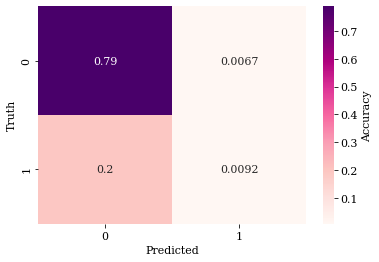

In [23]:
# Predict class for X.
y_predicted = model.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_predicted, normalize='all') # Remove 'normalize="all"' to get absolute numbers
plt.figure()
sn.heatmap(cm, annot=True, cmap='RdPu',cbar_kws={'label': 'Accuracy'})
# plt.title('Confusion matrix for prediction of '+y_name.lower())
plt.xlabel('Predicted')
plt.ylabel('Truth')